## Task: Game Platform Preference

You are interested in creating your own video game. Analyze a dataset from IGN which ranks the different platforms and game types.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as  sns
print('Setup complete')

Setup complete


### Load and Review Data
For this analysis we will use the: `ign_scores.csv`
- Use the `Platform` column as  index

In [2]:
df_ign_score = pd.read_csv('../data/ign_scores.csv', index_col='Platform')
df_ign_score.head()

,Action,"Action, Adventure",Adventure,Fighting,Platformer,Puzzle,RPG,Racing,Shooter,Simulation,Sports,Strategy
Platform,,,,,,,,,,,,
Dreamcast,6.882857,7.511111,6.281818,8.200000,8.340000,8.088889,7.700000,7.042500,7.616667,7.628571,7.272222,6.433333
Game Boy Advance,6.373077,7.507692,6.057143,6.226316,6.970588,6.532143,7.542857,6.657143,6.444444,6.928571,6.694444,7.175000
Game Boy Color,6.272727,8.166667,5.307692,4.500000,6.352941,6.583333,7.285714,5.897436,4.500000,5.900000,5.790698,7.400000
GameCube,6.532584,7.608333,6.753846,7.422222,6.665714,6.133333,7.890909,6.852632,6.981818,8.028571,7.481319,7.116667
Nintendo 3DS,6.670833,7.481818,7.414286,6.614286,7.503448,8.000000,7.719231,6.900000,7.033333,7.700000,6.388889,7.900000


### Task: Which Platform is the Best?

Create a `bar chart` that shows the average score for `racing` games, for each platform

Text(0.5, 1.0, 'Average rating for Racing games for each platform')

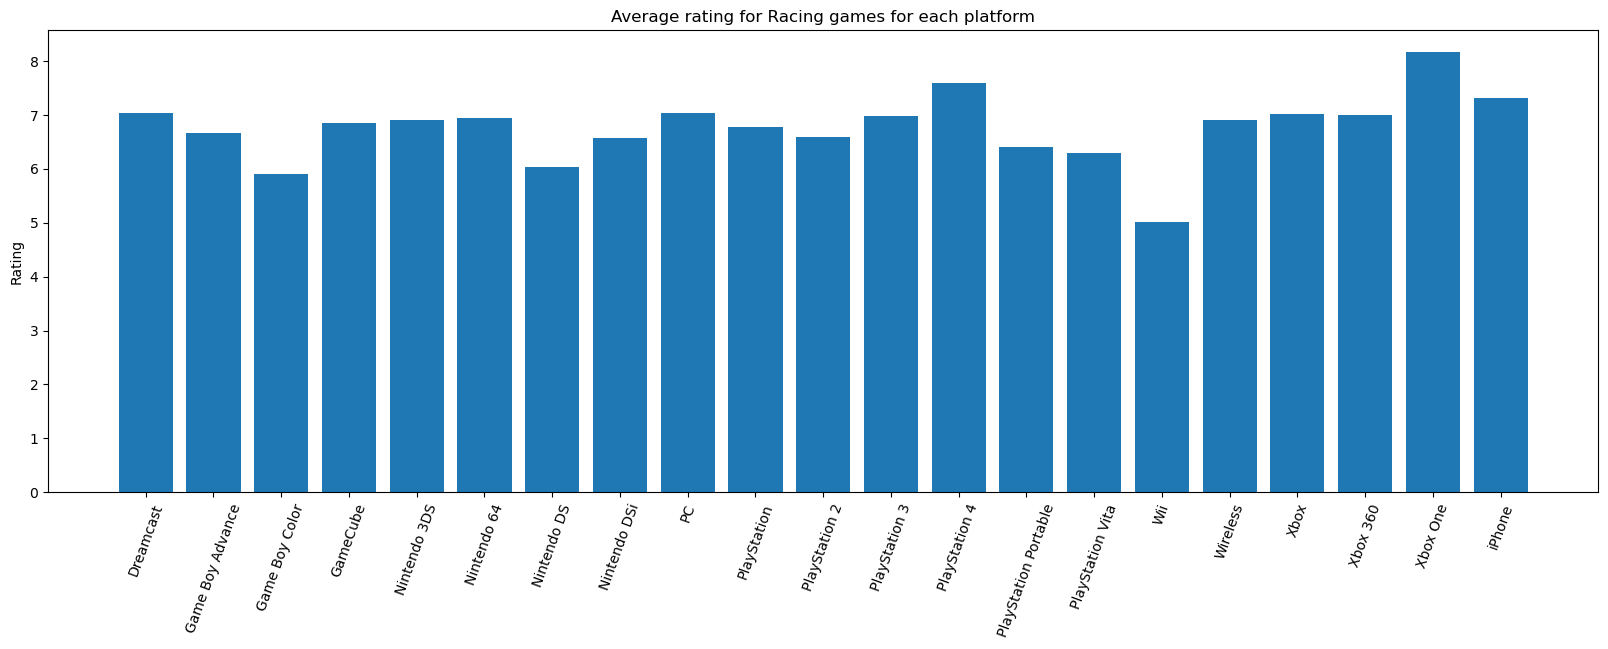

In [12]:
plt.figure(figsize=(20, 6))
plt.bar(x=df_ign_score.index, height=df_ign_score['Racing'])
plt.xticks(rotation=70)
plt.ylabel('Rating')
plt.title('Average rating for Racing games for each platform')

In [10]:
# Get the Platform with the highest rating
p = df_ign_score['Racing'].idxmax()
p

'Xbox One'

### Task: All Possible Combinations

Create a Heatmap of the average scores by genre on each cell

Text(0.5, 36.72222222222221, 'Genre')

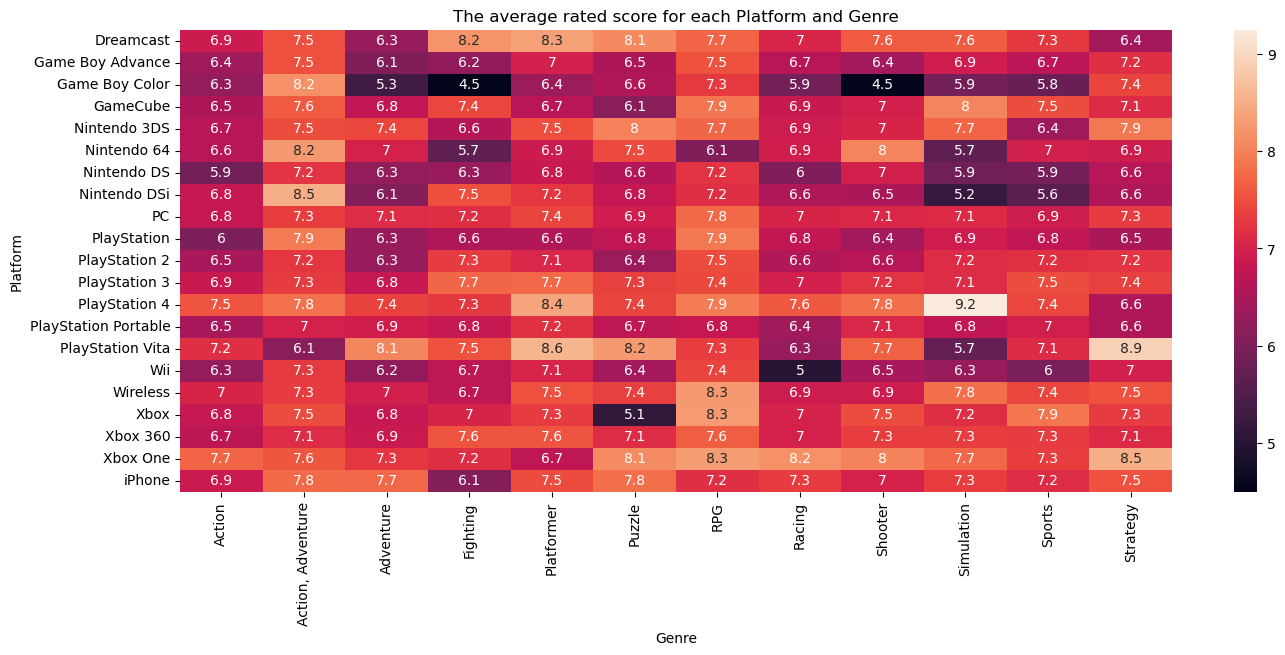

In [16]:
# Plot heatmap for all data
plt.figure(figsize=(16, 6))
plt.title('The average rated score for each Platform and Genre')
sns.heatmap(data=df_ign_score, annot=True)
plt.xlabel('Genre')

## Task: Which Combination is Best?
- Which combination of `genre` and `platform` receives the `highest` average ratings?
- Which combination receives the `lowest`

In [24]:
max_columns = df_ign_score.max()
genre_max = max_columns.idxmax()
value_max = df_ign_score[genre_max].max()
platform_max = df_ign_score[genre_max].idxmax()
print(f"Best score is at Genre {genre_max} and Platform {platform_max} with a score of {value_max}")

Best score is at Genre Simulation and Platform PlayStation 4 with a score of 9.25


In [25]:
min_columns = df_ign_score.min()
genre_min = min_columns.idxmin()
value_min = df_ign_score[genre_min].min()
platform_min = df_ign_score[genre_min].idxmin()
print(f"Lowest score is at Genre {genre_min} and Platform {platform_min} with a score of {value_min}")

Lowest score is at Genre Fighting and Platform Game Boy Color with a score of 4.5


In [26]:
# Using the Stack Method
# stack() Method makes a Series with multi-level index
highest_combination = df_ign_score.stack().idxmax() # Get tuple with columns
highest_combination_value = df_ign_score.stack().max() # get value
lowest_combination = df_ign_score.stack().idxmin() # Get tuple with columns
lowest_combination_value = df_ign_score.stack().min() # get value

print(f'Highest combination is: {highest_combination} with a rating of {highest_combination_value}')
print(f'Lowest combination is: {lowest_combination} with a rating of {lowest_combination_value}')

Highest combination is: ('PlayStation 4', 'Simulation') with a rating of 9.25
Lowest combination is: ('Game Boy Color', 'Fighting') with a rating of 4.5


## Task: Candy Preferences
Analyze a candy survey dataset: `data/candy.csv` for favorite candies.
- Use the `id` as the column index

### Setup and Load Data

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as  sns
print('Setup complete')

# Load data
df_candy = pd.read_csv('../data/candy.csv', index_col='id')
df_candy.head()

Setup complete


,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
id,,,,,,,,,,,,,
0,100 Grand,Yes,No,Yes,No,No,Yes,No,Yes,No,0.732,0.860,66.971725
1,3 Musketeers,Yes,No,No,No,Yes,No,No,Yes,No,0.604,0.511,67.602936
2,Air Heads,No,Yes,No,No,No,No,No,No,No,0.906,0.511,52.341465
3,Almond Joy,Yes,No,No,Yes,No,No,No,Yes,No,0.465,0.767,50.347546
4,Baby Ruth,Yes,No,Yes,Yes,Yes,No,No,Yes,No,0.604,0.767,56.914547


In [30]:
# Get the size
print(df_candy.shape)

(83, 13)


### Task: Popularity
Which candy, '3 Musketeers' or 'Almond Joy' was more popular?

In [36]:
more_pop_candy_idx = df_candy[df_candy["competitorname"].isin(['3 Musketeers', 'Almond Joy'])]['winpercent'].idxmax()
more_pop_candy = df_candy.loc[more_pop_candy_idx]
more_pop_candy

competitorname      3 Musketeers
chocolate                    Yes
fruity                        No
caramel                       No
peanutyalmondy                No
nougat                       Yes
crispedricewafer              No
hard                          No
bar                          Yes
pluribus                      No
sugarpercent               0.604
pricepercent               0.511
winpercent             67.602936
Name: 1, dtype: object

In [38]:
df_candy[df_candy["competitorname"].isin(['3 Musketeers', 'Almond Joy'])][['competitorname', 'sugarpercent']]

,competitorname,sugarpercent
id,,
1,3 Musketeers,0.604
3,Almond Joy,0.465


create a scatter plot that show the correlation between `sugarpercent` (x-axis) and `winpercent` (y-axis)

<Axes: xlabel='sugarpercent', ylabel='winpercent'>

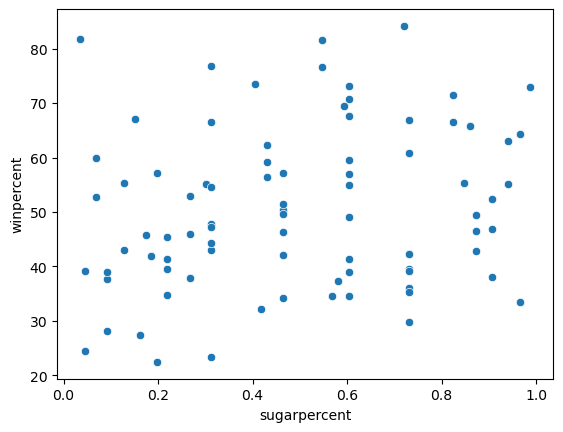

In [39]:
sns.scatterplot(data=df_candy, x='sugarpercent', y='winpercent')

Does the plot shows a **strong** correlation between the two variables?

If so, are candies with more sugar relatively more or less popular with the survey data?

<Axes: xlabel='sugarpercent', ylabel='winpercent'>

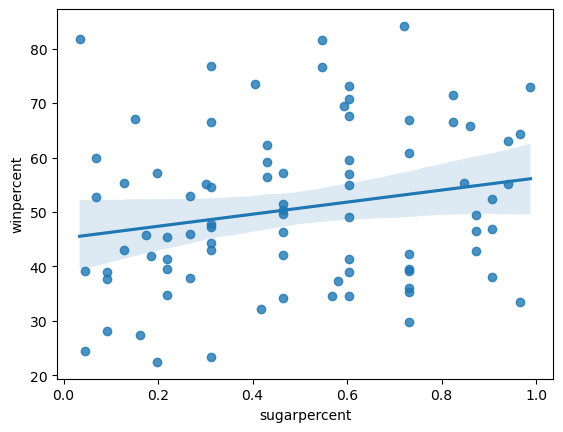

In [40]:
sns.regplot(data=df_candy, x='sugarpercent', y='winpercent')